# Downramp injection

Downramp injection is a injection method employed in LWFA and PWFA to inject electrons into the plasma cavity for later acceleration. 

In [1]:
# load modules
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
import scipy.constants as const
%matplotlib inline

## Downramp injection in PWFA

### define phase position $\chi$ of single electron

Define a phase (position) of an electron at lob-frame position $z$.

In [2]:
# placeholder
x = sym.symbols('x')  # speed of light

# constants
c = sym.symbols('c', positive=True)  # speed of light
q_e = sym.symbols('e', positive=True)  # electron charge
m_e = sym.symbols('m_e', positive=True)  # electron mass
epsilon_0 = sym.symbols('varepsilon_0', positive=True)  # electric permeability

# coordinates
z = sym.symbols('z', real=True)  # longitudinal position lab frame
t = sym.symbols('t', real=True)  # time lab frame
chi = sym.symbols('chi', real=True)  # longitudinal comoving position


# driver beam parameters
beta_b = sym.symbols('beta_b', positive=True)  # velocity of driver

# witness electron parameters
beta_e = sym.symbols('beta_e', positive=True)  # velocity of driver

# plasma parameters
beta_phi = sym.symbols('beta_phi', positive=True)  # plasma phase velocity
n = sym.Function('n', positive=True)(z)  # plasma density
omega_pe = sym.symbols('omega_pe', positive=True)  # plasma frequency
omega_pe_eq = sym.sqrt(n * q_e**2 / (m_e * epsilon_0))
k_pe = sym.symbols('k_pe', positive=True)  # velocity of driver
k_pe_eq = omega_pe / c


chi_eq = k_pe * (z - beta_b * t * c)

Plasma frequency:
$$ \omega_{pe} = \sqrt{\frac{e^2 n(z)}{\varepsilon_0 m_e}} $$

Plasma wave number:
$$ k_{pe} = \frac{\omega_{pe}}{c} $$

Comoving phase position:
$$ \chi = k_{pe} \cdot \left( z - \beta_b c t  \right) $$


### change of phase position $\chi$ along logitudinal coordinate $z$

How does the electron's phase position (at lab frame position $z$) changes with that position $z$?

In [3]:
d_chi_d_z_eq = sym.diff(chi_eq.subs(t, z/(c*beta_e)).subs(k_pe, k_pe_eq).subs(omega_pe, omega_pe_eq), z).subs(omega_pe_eq, omega_pe).subs(omega_pe_eq/n, omega_pe / n).subs(k_pe_eq, k_pe).subs(z/beta_e, c*t).subs(chi_eq, chi)

d_chi_d_z_eq

chi*Derivative(n(z), z)/(2*n(z)) + k_pe*(-beta_b/beta_e + 1)

change of phase position:
    $$ \frac{\mathrm{d} \chi}{\mathrm{d} z} =\frac{\chi}{2 n} \frac{\mathrm{d}n}{\mathrm{d} z} +   k_{pe} \cdot \left(1 - \frac{\beta_b}{\beta_e} \right)  $$

### Determine plasma phase velocity $\beta_\phi$
If an electron does not change its phase position ($\frac{\mathrm{d} \chi}{\mathrm{d} z} = 0$) its velocity $\beta_e$ equals the plasma phase velocity $\beta_\phi$. 

In [38]:
beta_e_for_diff_eqal_zero_eq = sym.simplify(sym.solve(sym.Eq(d_chi_d_z_eq, 0), beta_e)[0]) 

beta_phi_eq = beta_b * 1/(1 + chi/(2 * k_pe * n) * sym.diff(n,z))

if not beta_phi_eq.equals(beta_e_for_diff_eqal_zero_eq):
    print("False")
None

Plasma phase velocity: 
$$ \beta_\phi = \beta_{b} \left( 1 + \frac{\chi}{2 k_{pe} n^{3/2}} \frac{\mathrm{d}n}{\mathrm{d}z}   \right)^{-1} $$

### Simplifying the phase velocity $\frac{\mathrm{d} \chi}{\mathrm{d} z}$

In [5]:
chi_dn_dz_divdedBy_2_k_n = chi * sym.diff(n, z) / (2 * k_pe * n)
chi_dn_dz_divdedBy_2_k_n_eq = sym.solve(
    sym.Eq(beta_phi_eq, beta_phi), chi_dn_dz_divdedBy_2_k_n)[0]

In [6]:
d_chi_d_z_eq2 = sym.simplify(d_chi_d_z_eq.subs(
    chi_dn_dz_divdedBy_2_k_n * k_pe, chi_dn_dz_divdedBy_2_k_n_eq * k_pe))

d_chi_d_z_eq3 = beta_b * k_pe * (1/beta_phi - 1/beta_e)

if not d_chi_d_z_eq3.equals(d_chi_d_z_eq2):
    print("False")
None

$$ \frac{\mathrm{d}\chi}{\mathrm{d}z} = k_{pe} \beta_{b} \left( \frac{1}{\beta_\phi}  - \frac{1}{\beta_e}\right) $$

### Trapping condition

In [7]:
sym.solve(1/beta_phi - 1/beta_e >= 0, beta_e )

beta_phi <= beta_e

For electron trapping, $\frac{\mathrm{d} \chi}{\mathrm{d} z} \geq 0$ and thus it is required that $\beta_\phi \leq \beta_{e}$.

### Plotting for later 

In [24]:
z_np = np.linspace(0,12., 256)
peak_height_np = 10.
sigma_peak_np = 2.5
n_np = 1. + (peak_height_np-1.) * np.exp(-z_np**2/(2*sigma_peak_np**2))

beta_b_np = 1.0
beta_phi_np = beta_b_np / (1. + -2.*np.pi/2. *n_np[1:]**(-3./2.) * np.diff(n_np)/(z_np[1]-z_np[0]))


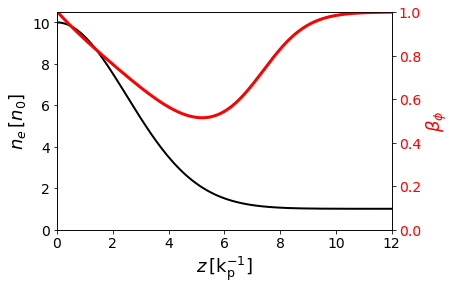

In [45]:
plt.figure(facecolor="w")

plt.plot(z_np, n_np, color="black", lw=2)
plt.xlim(0,12)
plt.ylim(0, 10.5)

plt.xlabel(r"$z \, \mathrm{[k_p^{-1}]} $", fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel(r"$n_e\,[n_0]$", fontsize=18)
plt.yticks(fontsize=14)

plt.twinx()

plt.plot(z_np[1:], beta_phi_np, color="red", lw=3)

#plt.plot(z_np[1:], (1-2.*np.pi/2.*np.diff(n_np)/z_np[1])**-1, "--", color="orange", lw=2)

plt.ylabel(r"$\beta_\phi $", fontsize=18, color="red")
plt.yticks(fontsize=14, color="red")

#plt.plot(z_np, 0.6/np.sqrt(n_np), "--", color="C0")
#plt.plot(z_np, 0.8/np.sqrt(n_np), "--", color="C2")
#plt.fill_between(z_np[1:], 0.8/np.sqrt(n_np[1:]), beta_phi_np, where=np.greater_equal(0.8/np.sqrt(n_np[1:]), beta_phi_np), color="C1")


plt.ylim(0, 1)
plt.show()

I do not understand this $\beta_\phi$, it looks realy different to Alberto's plot see [Alberto Martinez de la Ossa et al. PRAB 2017](https://doi.org/10.1103/PhysRevAccelBeams.20.091301) Figure 1 (a). 

In [41]:
plt.figure?